# PaySim Dataset : 
# Fraud Detection Using VAE and BNN 

The project is devided into 4 parts : 

1. Data pre-processing.
2. Data Augmentation using VAE.
3. Classification using BNN.
4. Results : 
    1. Exploring the parameters destributions and plotting examples.
    2. Model evaluation.
    
P.S : ameliorations which will be made to this notebook in the near future :
- demystificaiton of each model.
- re-training the models with the full dataset (12 million data points fully balanced) insead of 16K datapoints.
- and ofc cleaning and re-structuring for public usage.

Author : **Mohamed HMINI** from INSEA / M2SI

## 1. Data pre-processing : 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpt
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
np.set_printoptions(precision=3)

In [2]:
root = "D:\insea-student\S3\COMM\project"
os.chdir(root)
os.getcwd()

'D:\\insea-student\\S3\\COMM\\project'

In [3]:
paysim = pd.read_csv("paysim-data.csv")

In [4]:
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
paysim.drop(['nameDest', 'nameOrig'], axis = 1, inplace = True)

In [7]:
paysim.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [8]:
trans_type = pd.get_dummies(paysim.type)
trans_type.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [9]:
paysim = trans_type.join(paysim)
paysim.drop(['type'], axis = 1, inplace = True)

In [12]:
cols = ['isFraud']
cols.extend([col for col in paysim.columns if col != 'isFraud'])
paysim = paysim[cols]

In [13]:
paysim.head()

,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0,0,0,0,1,0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,0,0,0,0,1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,0,0,0,0,1,1,181.00,181.0,0.00,0.0,0.0,0
3,1,0,1,0,0,0,1,181.00,181.0,0.00,21182.0,0.0,0
4,0,0,0,0,1,0,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [14]:
cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
paysim[cols] = paysim[cols].apply(lambda x: (x - x.mean())/x.std())

In [15]:
paysim.head()

,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,0,0,0,0,1,0,-1.703041,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0
1,0,0,0,0,1,0,-1.703041,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0
2,1,0,0,0,0,1,-1.703041,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,0
3,1,0,1,0,0,0,-1.703041,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,0
4,0,0,0,0,1,0,-1.703041,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0


In [16]:
isfraud = paysim[paysim['isFraud'] == 1][:8000]
notfraud = paysim[paysim['isFraud'] == 0][:8000]
dummy = isfraud.append(notfraud)

In [292]:
notfraud = paysim[paysim['isFraud'] == 0][:8000]
dummy = isfraud.append(notfraud)
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(dummy[[col for col in dummy.columns if col not in ['isFraud', 'isFlaggedFraud']]])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16000 samples in 0.140s...
[t-SNE] Computed neighbors for 16000 samples in 0.972s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16000
[t-SNE] Computed conditional probabilities for sample 2000 / 16000
[t-SNE] Computed conditional probabilities for sample 3000 / 16000
[t-SNE] Computed conditional probabilities for sample 4000 / 16000
[t-SNE] Computed conditional probabilities for sample 5000 / 16000
[t-SNE] Computed conditional probabilities for sample 6000 / 16000
[t-SNE] Computed conditional probabilities for sample 7000 / 16000
[t-SNE] Computed conditional probabilities for sample 8000 / 16000
[t-SNE] Computed conditional probabilities for sample 9000 / 16000
[t-SNE] Computed conditional probabilities for sample 10000 / 16000
[t-SNE] Computed conditional probabilities for sample 11000 / 16000
[t-SNE] Computed conditional probabilities for sample 12000 / 16000
[t-SNE] Computed conditional probabilities for sam

In [15]:
def visualize_TSNE(X, colors, clables = ['red', 'green'], dplabels = ['not Fraud', 'Fraud'], title = "TSNE reduction of 8k fraud and 8k not fraud transaction datapoints"):
    cdict = {i:clables[i] for i in range(len(clables))}
    labels = {i:dplabels[i] for i in range(len(dplabels))}
    fig, ax = plt.subplots(figsize = (10, 7))
    for grp in cdict.keys():
        ix = np.where(colors == grp)
        ax.scatter(X[:,0][ix], X[:, 1][ix], c = cdict[grp], label = labels[grp])
        plt.title(label = title)
        plt.xlabel("First Component")
        plt.ylabel("Second Component")
        plt.legend()

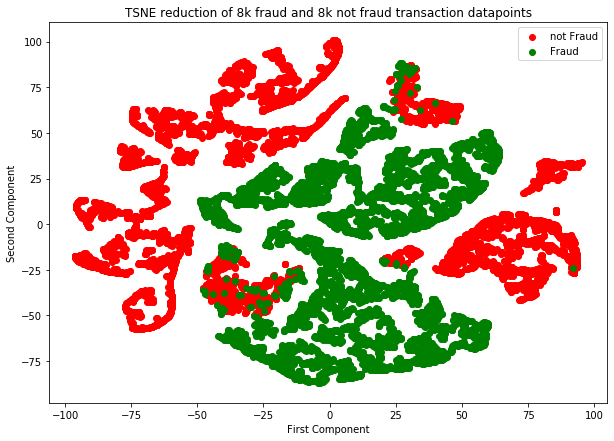

In [293]:
colors = dummy['isFraud'].to_numpy()
visualize_TSNE(tsne_em, colors)

## 2. Data Augmentation using VAE : 

In [17]:
import torch
from torch.utils.data import DataLoader, Dataset, random_split
import torch.nn as nn
import pyro
import pyro.distributions as dist
from pyro.infer import SVI, Trace_ELBO
from pyro.optim import Adam
from pyro.infer import Predictive

In [18]:
pyro.enable_validation(True)
pyro.distributions.enable_validation(False)
pyro.set_rng_seed(0)
# Enable smoke test - run the notebook cells on CI.
smoke_test = 'CI' in os.environ

In [19]:
fraud = paysim[paysim['isFraud'] == 1]
fraud.head()

,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
2,1,0,0,0,0,1,-1.703041,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,0
3,1,0,1,0,0,0,-1.703041,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,0
251,1,0,0,0,0,1,-1.703041,-0.293208,-0.287745,-0.292442,-0.323814,-0.333411,0
252,1,0,1,0,0,0,-1.703041,-0.293208,-0.287745,-0.292442,-0.316106,-0.333411,0
680,1,0,0,0,0,1,-1.703041,-0.264522,-0.281747,-0.292442,-0.323814,-0.333411,0


In [20]:
class FraudDataset(Dataset):
    def __init__(self, subset):
        self.subset = subset
        self.n_samples = len(subset)
    def __getitem__(self, index):
        return self.subset[index]
    def __len__(self):
        return self.n_samples

In [55]:
def setup_data_loaders(train_ds, test_ds, batch_size=10, use_cuda=True):
    kwargs = {'num_workers': 0, 'pin_memory': use_cuda}
    train_loader = DataLoader(dataset=train_ds,
        batch_size=batch_size, shuffle=True, **kwargs)
    test_loader = DataLoader(dataset=test_ds,
        batch_size=batch_size, shuffle=False, **kwargs)
    return train_loader, test_loader

In [21]:
class Decoder(nn.Module):
    def __init__(self, z_dim, hidden_dim, hidden_dim2):
        super().__init__()
        self.fc1 = nn.Linear(z_dim, hidden_dim)
        self.softplus = nn.Softplus()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
        self.softplus2 = nn.Softplus()
        self.fc3 = nn.Linear(hidden_dim2, 12)
    
    def forward(self, z):
        hidden = self.softplus(self.fc1(z))
        hidden2 = self.softplus2(self.fc2(hidden))
        out = self.fc3(hidden2)
#         out[:5] = torch.where(out[:5] == out[:5].max(), 1, 0)
#         out[-1] = out[-1] > 0 if 1 else 0
        return out

In [22]:
class Encoder(nn.Module):
    def __init__(self, z_dim, hidden_dim, hidden_dim2):
        super().__init__()
        self.fc1 = nn.Linear(12, hidden_dim)
        self.softplus = nn.Softplus()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim2)
        self.softplus2 = nn.Softplus()
        self.fc31 = nn.Linear(hidden_dim2, z_dim)
        self.fc32 = nn.Linear(hidden_dim2, z_dim)
        self.softplus = nn.Softplus()

    def forward(self, x):
        hidden = self.softplus(self.fc1(x))
        hidden2 = self.softplus2(self.fc2(hidden))
        z_loc = self.fc31(hidden2)
        z_scale = torch.exp(self.fc32(hidden2))
        return z_loc, z_scale

In [23]:
class VAE(nn.Module):
    def __init__(self, z_dim=3, hidden_dim=8, hidden_dim2 = 6, use_cuda=False):
        super().__init__()
        self.encoder = Encoder(z_dim, hidden_dim, hidden_dim2)
        self.encoder.double()
        self.decoder = Decoder(z_dim, hidden_dim, hidden_dim2)
        self.decoder.double()
        if use_cuda:
            self.cuda()
        self.use_cuda = use_cuda
        self.z_dim = z_dim

    # define the model p(x|z)p(z)
    def model(self, x):
        pyro.module("decoder", self.decoder)
        with pyro.plate("data", x.shape[0]):
            # setup hyperparameters for prior p(z)
            z_loc = x.new_zeros(torch.Size((x.shape[0], self.z_dim)))
            z_scale = x.new_ones(torch.Size((x.shape[0], self.z_dim)))
            # sample from prior (value will be sampled by guide when computing the ELBO)
            z = pyro.sample("latent", dist.Normal(z_loc, z_scale).to_event(1))
            # decode the latent code z
            trans = self.decoder(z)
            # score against actual transaction
            pyro.sample("obs", dist.Normal(trans, 1).to_event(1), obs=x)

    # define the guide (i.e. variational distribution) q(z|x)
    def guide(self, x):
        # register PyTorch module `encoder` with Pyro
        pyro.module("encoder", self.encoder)
        with pyro.plate("data", x.shape[0]):
            # use the encoder to get the parameters used to define q(z|x)
            z_loc, z_scale = self.encoder(x)
            # sample the latent code z
            pyro.sample("latent", dist.Normal(z_loc, z_scale).to_event(1))

    def reconstruct_transaction(self, x):
        z_loc, z_scale = self.encoder(x)
        z = dist.Normal(z_loc, z_scale).sample()
        trans = self.decoder(z)
        return trans

In [303]:
def train(svi, train_loader, use_cuda=True):
    epoch_loss = 0.
    for x in train_loader:
        if use_cuda:
            x = x.cuda()
        epoch_loss += svi.step(x)

    normalizer_train = len(train_loader.dataset)
    total_epoch_loss_train = epoch_loss / normalizer_train
    return total_epoch_loss_train

In [304]:
def evaluate(svi, test_loader, use_cuda=True):
    test_loss = 0.
    for x in test_loader:
        if use_cuda:
            x = x.cuda()
        test_loss += svi.evaluate_loss(x)
    normalizer_test = len(test_loader.dataset)
    total_epoch_loss_test = test_loss / normalizer_test
    return total_epoch_loss_test

In [24]:
LEARNING_RATE = 1.0e-3
USE_CUDA = True
NUM_EPOCHS = 1 if smoke_test else 100
TEST_FREQUENCY = 5
device = "cuda:0"

In [25]:
fraud_values = fraud.values[:,1:] 
l = fraud_values.shape[0]
lengths = int(l*0.8), l - int(l*0.8)
fraud_train, fraud_test = random_split(fraud_values, lengths)
fraud_train_ds = FraudDataset(fraud_train)
fraud_test_ds = FraudDataset(fraud_test)

In [308]:
train_loader, test_loader = setup_data_loaders(fraud_train_ds, fraud_test_ds, batch_size=10, use_cuda=USE_CUDA)

In [26]:
pyro.clear_param_store()
vae = VAE(use_cuda=USE_CUDA)

adam_args = {"lr": LEARNING_RATE}
optimizer = Adam(adam_args)

# setup the inference algorithm
svi = SVI(vae.model, vae.guide, optimizer, loss=Trace_ELBO())

vae_train_elbo = []
vae_test_elbo = []

In [310]:
# training loop
for epoch in range(NUM_EPOCHS):
    total_epoch_loss_train = train(svi, train_loader, use_cuda=USE_CUDA)
    vae_train_elbo.append(total_epoch_loss_train)
    print("[epoch %03d]  average training loss: %.4f" % (epoch, total_epoch_loss_train))

    if epoch % TEST_FREQUENCY == 0:
        # report test diagnostics
        total_epoch_loss_test = evaluate(svi, test_loader, use_cuda=USE_CUDA)
        vae_test_elbo.append(total_epoch_loss_test)
        print("[epoch %03d] average test loss: %.4f" % (epoch, total_epoch_loss_test))

[epoch 000]  average training loss: 21.8567
[epoch 000] average test loss: 20.6073
[epoch 001]  average training loss: 16.0456
[epoch 002]  average training loss: 15.3755
[epoch 003]  average training loss: 15.2476
[epoch 004]  average training loss: 15.1184
[epoch 005]  average training loss: 14.9752
[epoch 005] average test loss: 17.3104
[epoch 006]  average training loss: 14.8725
[epoch 007]  average training loss: 14.7898
[epoch 008]  average training loss: 14.7447
[epoch 009]  average training loss: 14.7225
[epoch 010]  average training loss: 14.7093
[epoch 010] average test loss: 17.0732
[epoch 011]  average training loss: 14.6707
[epoch 012]  average training loss: 14.6791
[epoch 013]  average training loss: 14.6662
[epoch 014]  average training loss: 14.6632
[epoch 015]  average training loss: 14.6577
[epoch 015] average test loss: 17.0485
[epoch 016]  average training loss: 14.6281
[epoch 017]  average training loss: 14.6386
[epoch 018]  average training loss: 14.6329
[epoch 0

In [311]:
torch.save(vae, "./vae")

In [28]:
pyro.clear_param_store()
vae = torch.load("./vae.pt")

In [26]:
def plot_loss(epoches, loss, title):
    plt.figure(figsize = (10,7))
    plt.plot(list(range(epoches)), loss, label=title)
    plt.xlabel("Epoch")
    plt.ylabel("ELBO")
    plt.legend()

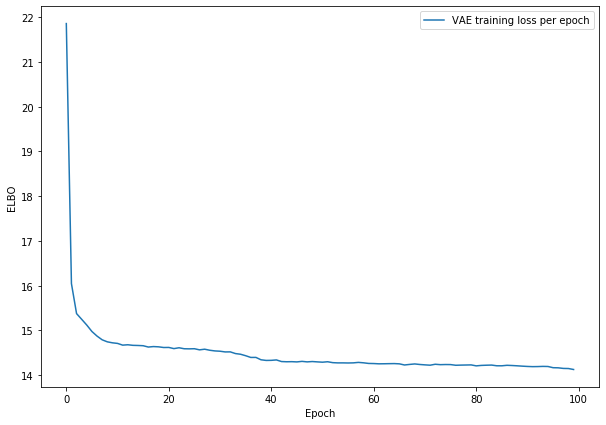

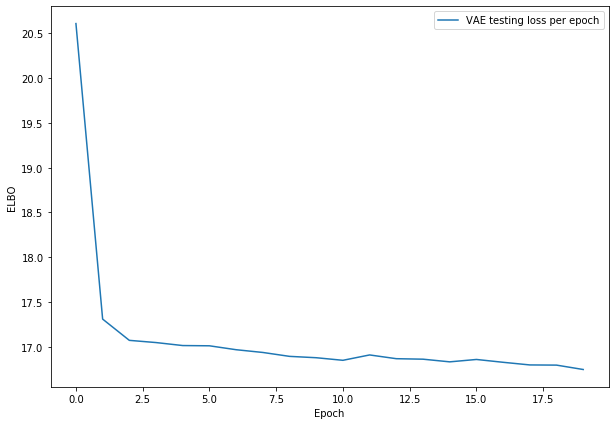

In [315]:
plot_loss(NUM_EPOCHS, vae_train_elbo, "VAE training loss per epoch")
plot_loss(len(vae_test_elbo), vae_test_elbo, "VAE testing loss per epoch")

#### Decoding : 

In [29]:
def generate_fraud(size = 8e3):
    fraud_sample_size = int(size)
    z_loc = torch.zeros(fraud_sample_size, 3)
    z_scale = torch.ones(fraud_sample_size, 3)
    # sample from prior (value will be sampled by guide when computing the ELBO)
    z = pyro.sample("latent", dist.Normal(z_loc, z_scale).to_event(1))
    z = z.to(device)
    vae.float()
    vae.to(device)
    fraud_gen = vae.decoder(z)
    fraud_gen = fraud_gen.detach()
    fraud_gen = fraud_gen.to("cpu")
    return fraud_gen

In [30]:
def reconstruct_fraud(fraud_gen):
    fraud_gen[:, :5] = torch.where(fraud_gen[:, :5] == fraud_gen[:, :5].max(axis = 1).values.reshape(-1, 1), 1, 0)
    fraud_gen[:, -1] = fraud_gen[:, -1] > 0 if 1 else 0
    return fraud_gen

In [31]:
fraud_gen = generate_fraud()
fraud_gen = reconstruct_fraud(fraud_gen)

In [319]:
notfraud = paysim[paysim['isFraud'] == 0][:8000][[col for col in paysim.columns if col != 'isFraud']]
dummy = np.vstack((notfraud.values,fraud_gen.numpy()))
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(dummy)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16000 samples in 0.071s...
[t-SNE] Computed neighbors for 16000 samples in 1.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16000
[t-SNE] Computed conditional probabilities for sample 2000 / 16000
[t-SNE] Computed conditional probabilities for sample 3000 / 16000
[t-SNE] Computed conditional probabilities for sample 4000 / 16000
[t-SNE] Computed conditional probabilities for sample 5000 / 16000
[t-SNE] Computed conditional probabilities for sample 6000 / 16000
[t-SNE] Computed conditional probabilities for sample 7000 / 16000
[t-SNE] Computed conditional probabilities for sample 8000 / 16000
[t-SNE] Computed conditional probabilities for sample 9000 / 16000
[t-SNE] Computed conditional probabilities for sample 10000 / 16000
[t-SNE] Computed conditional probabilities for sample 11000 / 16000
[t-SNE] Computed conditional probabilities for sample 12000 / 16000
[t-SNE] Computed conditional probabilities for sam

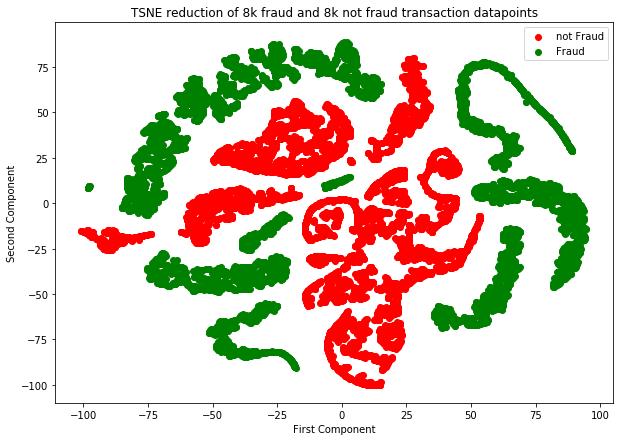

In [320]:
colors = np.hstack((np.repeat(0, 8000), np.repeat(1, 8000)))
visualize_TSNE(tsne_em, colors)

In [321]:
notfraud = paysim[paysim['isFraud'] == 0][:16000][[col for col in paysim.columns if col != 'isFraud']]
dummy = np.vstack((notfraud.values, fraud.values[:,1:], fraud_gen.numpy()))
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(dummy)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 32213 samples in 0.120s...
[t-SNE] Computed neighbors for 32213 samples in 3.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 32213
[t-SNE] Computed conditional probabilities for sample 2000 / 32213
[t-SNE] Computed conditional probabilities for sample 3000 / 32213
[t-SNE] Computed conditional probabilities for sample 4000 / 32213
[t-SNE] Computed conditional probabilities for sample 5000 / 32213
[t-SNE] Computed conditional probabilities for sample 6000 / 32213
[t-SNE] Computed conditional probabilities for sample 7000 / 32213
[t-SNE] Computed conditional probabilities for sample 8000 / 32213
[t-SNE] Computed conditional probabilities for sample 9000 / 32213
[t-SNE] Computed conditional probabilities for sample 10000 / 32213
[t-SNE] Computed conditional probabilities for sample 11000 / 32213
[t-SNE] Computed conditional probabilities for sample 12000 / 32213
[t-SNE] Computed conditional probabilities for sam

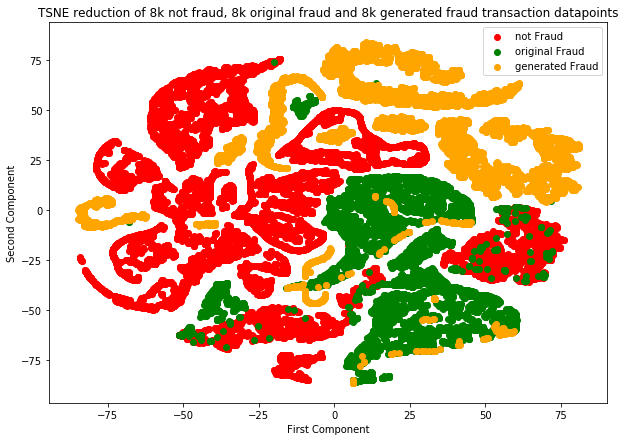

In [324]:
colors = np.hstack((np.repeat(0, 16000), np.repeat(1, 8000), np.repeat(2, 8000)))
visualize_TSNE(
    tsne_em, 
    colors, 
    clables = ['red', 'green', 'orange'],
    dplabels = ['not Fraud', 'original Fraud', 'generated Fraud'],
    title = "TSNE reduction of 8k not fraud, 8k original fraud and 8k generated fraud transaction datapoints"
)

## 3. Classification using BNN : 

In [32]:
from pyro.nn import PyroSample, PyroModule
from pyro.infer.autoguide import AutoDiagonalNormal

In [33]:
class PaysimDataset(Dataset):
    def __init__(self, subset):
        self.x = subset[:,1:]
        self.y = subset[:,0]
        self.n_samples = subset.shape[0]
    def __getitem__(self, index):
        x,y = self.x[index], self.y[index]
        return x,y
    def __len__(self):
        return self.n_samples

In [34]:
DATA_SIZE = 16000

In [35]:
fraud_gen = generate_fraud(DATA_SIZE//2)
fraud_gen = reconstruct_fraud(fraud_gen)

In [36]:
fraud_gen = torch.cat((torch.ones(fraud_gen.shape[0]).reshape(-1, 1), fraud_gen), 1)
fraud = torch.cat((fraud_gen, torch.tensor(fraud.values)), 0)

In [37]:
nofraud = paysim[paysim['isFraud'] == 0][:DATA_SIZE].values

In [38]:
paysim2 = torch.cat((fraud, torch.tensor(nofraud)), 0)
r = torch.randperm(paysim2.shape[0])
paysim2 = paysim2[r]
paysim2 = paysim2.detach()

In [39]:
paysim2 = paysim2.to("cpu")
paysim2

tensor([[ 1.0000,  0.0000,  0.0000,  ..., -0.2904,  0.0593,  1.0000],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.3238, -0.3334,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  ..., -0.2392, -0.2295,  1.0000],
        ...,
        [ 1.0000,  0.0000,  0.0000,  ..., -0.3238, -0.3334,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  ...,  0.0407,  0.4165,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  ..., -0.2379, -0.2260,  1.0000]],
       dtype=torch.float64)

In [50]:
device = "cpu"

In [41]:
class BayesianNN(PyroModule):
    def __init__(self, in_features, hidden_dim, out_features):
        super().__init__()
        self.fc1 = PyroModule[nn.Linear](in_features, hidden_dim)
        self.fc1.weight = PyroSample(dist.Normal(0., 1.).expand([hidden_dim, in_features]).to_event(2))
        self.fc1.bias = PyroSample(dist.Normal(0., 10.).expand([hidden_dim]).to_event(1))
        self.softplus = PyroModule[nn.Softplus]()
        
        self.fc2 = PyroModule[nn.Linear](hidden_dim, out_features)
        self.fc2.weight = PyroSample(dist.Normal(0., 1.).expand([out_features, hidden_dim]).to_event(2))
        self.fc2.bias = PyroSample(dist.Normal(0., 10.).expand([out_features]).to_event(1))
        self.sigmoid = PyroModule[nn.Sigmoid]()

    def forward(self, x, y=None):
        p = self.softplus(self.fc1(x).squeeze(-1))
        p = self.sigmoid(self.fc2(p).squeeze(-1))
        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs", dist.Bernoulli(p), obs=y)
        return p

In [51]:
def train(svi, train_loader, use_cuda=True):
    epoch_loss = 0.
    for data in train_loader:
        x = data[0].to(device)
        y = data[1].to(device)
        epoch_loss += svi.step(x, y)
    normalizer_train = len(train_loader.dataset)
    total_epoch_loss_train = epoch_loss / normalizer_train
    return total_epoch_loss_train

In [52]:
def evaluate(svi, test_loader, use_cuda=True):
    test_loss = 0.
    for data in test_loader:
        x = data[0].to(device)
        y = data[1].to(device)
        test_loss += svi.evaluate_loss(x, y)
    normalizer_test = len(test_loader.dataset)
    total_epoch_loss_test = test_loss / normalizer_test
    return total_epoch_loss_test

In [53]:
l = paysim2.shape[0]
lengths = int(l*0.8), l - int(l*0.8)
paysim_train, paysim_test = random_split(paysim2.float(), lengths)
paysim_train_ds = PaysimDataset(paysim_train.dataset)
paysim_test_ds = PaysimDataset(paysim_test.dataset)

In [56]:
train_loader, test_loader = setup_data_loaders(paysim_train_ds, paysim_test_ds, batch_size=800, use_cuda=USE_CUDA)

In [57]:
model = BayesianNN(12, 6, 1)
model.to(device)
model.float()
guide = AutoDiagonalNormal(model)

In [58]:
pyro.clear_param_store()

adam_args = {"lr": LEARNING_RATE}
optimizer = Adam(adam_args)

svi = SVI(model, guide, optimizer, loss=Trace_ELBO())

cls_train_elbo = []
cls_test_elbo = []

In [59]:
for epoch in range(200):
    total_epoch_loss_train = train(svi, train_loader, use_cuda=USE_CUDA)
    cls_train_elbo.append(-total_epoch_loss_train)
    print("[epoch %03d]  average training loss: %.4f" % (epoch, total_epoch_loss_train))

    if epoch % TEST_FREQUENCY == 0:
        total_epoch_loss_test = evaluate(svi, test_loader, use_cuda=USE_CUDA)
        cls_test_elbo.append(-total_epoch_loss_test)
        print("[epoch %03d] average test loss: %.4f" % (epoch, total_epoch_loss_test))

[epoch 000]  average training loss: 1.1799
[epoch 000] average test loss: 1.1120
[epoch 001]  average training loss: 1.0761
[epoch 002]  average training loss: 1.0062
[epoch 003]  average training loss: 0.9423
[epoch 004]  average training loss: 0.8653
[epoch 005]  average training loss: 0.7991
[epoch 005] average test loss: 0.7601
[epoch 006]  average training loss: 0.7339
[epoch 007]  average training loss: 0.6731
[epoch 008]  average training loss: 0.6308
[epoch 009]  average training loss: 0.5644
[epoch 010]  average training loss: 0.5229
[epoch 010] average test loss: 0.4945
[epoch 011]  average training loss: 0.4761
[epoch 012]  average training loss: 0.4466
[epoch 013]  average training loss: 0.4141
[epoch 014]  average training loss: 0.3857
[epoch 015]  average training loss: 0.3656
[epoch 015] average test loss: 0.3541
[epoch 016]  average training loss: 0.3506
[epoch 017]  average training loss: 0.3351
[epoch 018]  average training loss: 0.3210
[epoch 019]  average training l

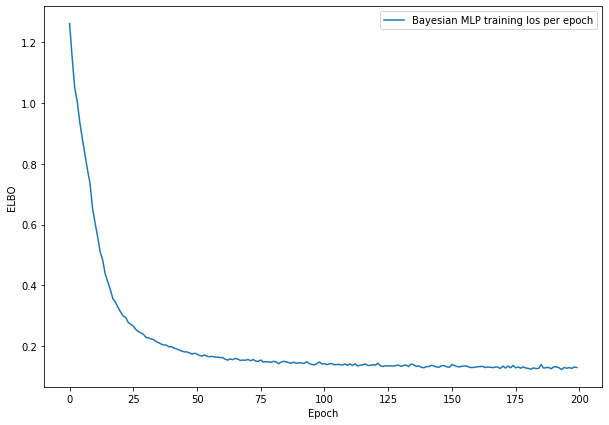

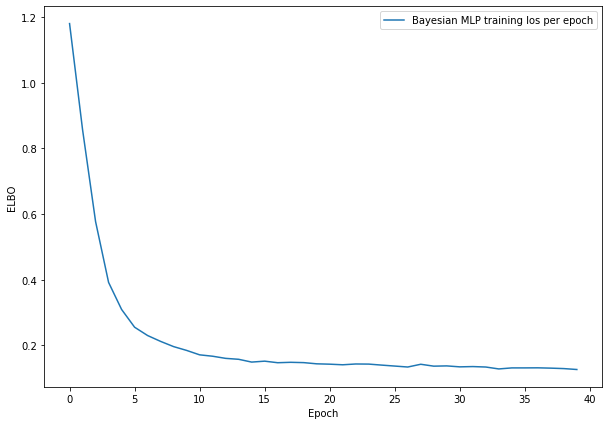

In [51]:
plot_loss(200, -1*np.array(cls_train_elbo), "Bayesian MLP training los per epoch")
plot_loss(len(cls_test_elbo), -1*np.array(cls_test_elbo), "Bayesian MLP training los per epoch")

In [52]:
torch.save(model, "./bnn.pt")

In [43]:
pyro.clear_param_store()
model = torch.load('./bnn.pt')

## 4. Results : 

### A. Exploration :

In [47]:
def summary(samples):
    site_stats = []
    for v in samples:
        site_stats.append({
            "mean": np.around(torch.mean(v, 0).detach().numpy(), 3).item(),
            "std": torch.std(v, 0).item(),
            "5%": v.kthvalue(int(len(v) * 0.05), dim=0)[0].item(),
            "25%": v.kthvalue(int(len(v) * 0.25), dim=0)[0].item(),
            "50%": v.kthvalue(int(len(v) * 0.50), dim=0)[0].item(),
            "75%": v.kthvalue(int(len(v) * 0.75), dim=0)[0].item(),
            "95%": v.kthvalue(int(len(v) * 0.95), dim=0)[0].item(),
        })
    return site_stats

In [48]:
def get_samples(X, num_samples, return_sites):
    predictive = Predictive(model, guide=guide, num_samples=num_samples, return_sites = return_sites)
    samples = predictive(X.float())
    return samples

In [60]:
samples = get_samples(
    torch.tensor(paysim.values[90000:90001,1:]),
    num_samples = 1000,
    return_sites = ['fc1.weight']
)
weights = samples['fc1.weight'].reshape(1000,6*12)

In [61]:
summ = summary(weights[:, [0,30,50,60]].T)

In [62]:
def plot_summary_text(plot, summ):
    i = 0
    for k,v in summ.items():
        plot.text(0.5,-0.2 - i/10, k + " : %.3f"%v, size=12, ha="center", transform=plot.transAxes)
        i+=1

In [63]:
def plot_samples(data, summ, x = 2,y = 2, colors = ['orange', 'purple', 'crimson', 'steelblue'], figsize = (15,10), pad = 13.0, title = ""):
    fig, axs = plt.subplots(x,y, figsize = figsize)
    fig.tight_layout(pad=pad)
    loc = 0
    for i in range(x):
        for j in range(y):
            axs[i,j].hist(data[:,loc].detach().numpy(), bins = 100, color=colors[loc], density = True)
            axs[i,j].axvline(summ[loc]['mean'], color='k', linestyle='dashed', linewidth=1)
            plot_summary_text(axs[i,j], summ[loc])
            loc+=1
    fig.suptitle(title, size = 20)
    plt.show()

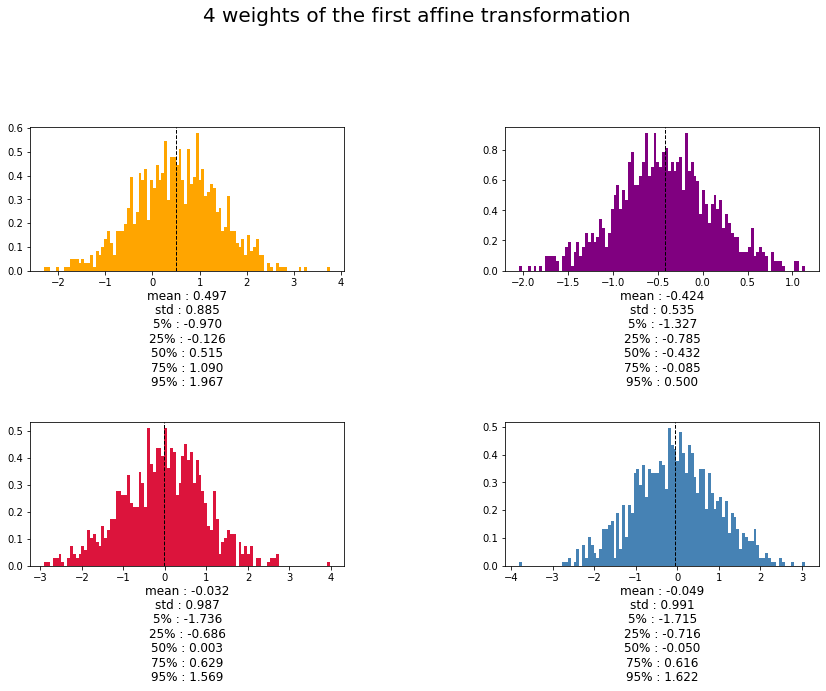

In [64]:
plot_samples(weights[:,[0,30,50,60]], summ, title = "4 weights of the first affine transformation")

In [65]:
fraud_gen = generate_fraud(2)
fraud_gen = reconstruct_fraud(fraud_gen)
fraud_gen = fraud_gen.detach()

In [66]:
dps =  torch.tensor(torch.tensor(np.vstack((paysim.values[90008:90010], paysim[paysim['isFraud'] == 1].values[1000:1002], np.hstack((np.repeat(1,2).reshape(-1,1),fraud_gen.numpy())), paysim.values[0:2]))))
samples = get_samples(
    dps[:,1:],
    num_samples = 1000,
    return_sites = ['obs', '_RETURN']
)
obs = samples['obs']
ps = samples['_RETURN']

C:\Users\MOHAMED HMINI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [67]:
summ = summary(ps.T)
cnt = 0
for dp in summ:
    dp['true class'] = int(dps[cnt, 0].item())
    cnt += 1

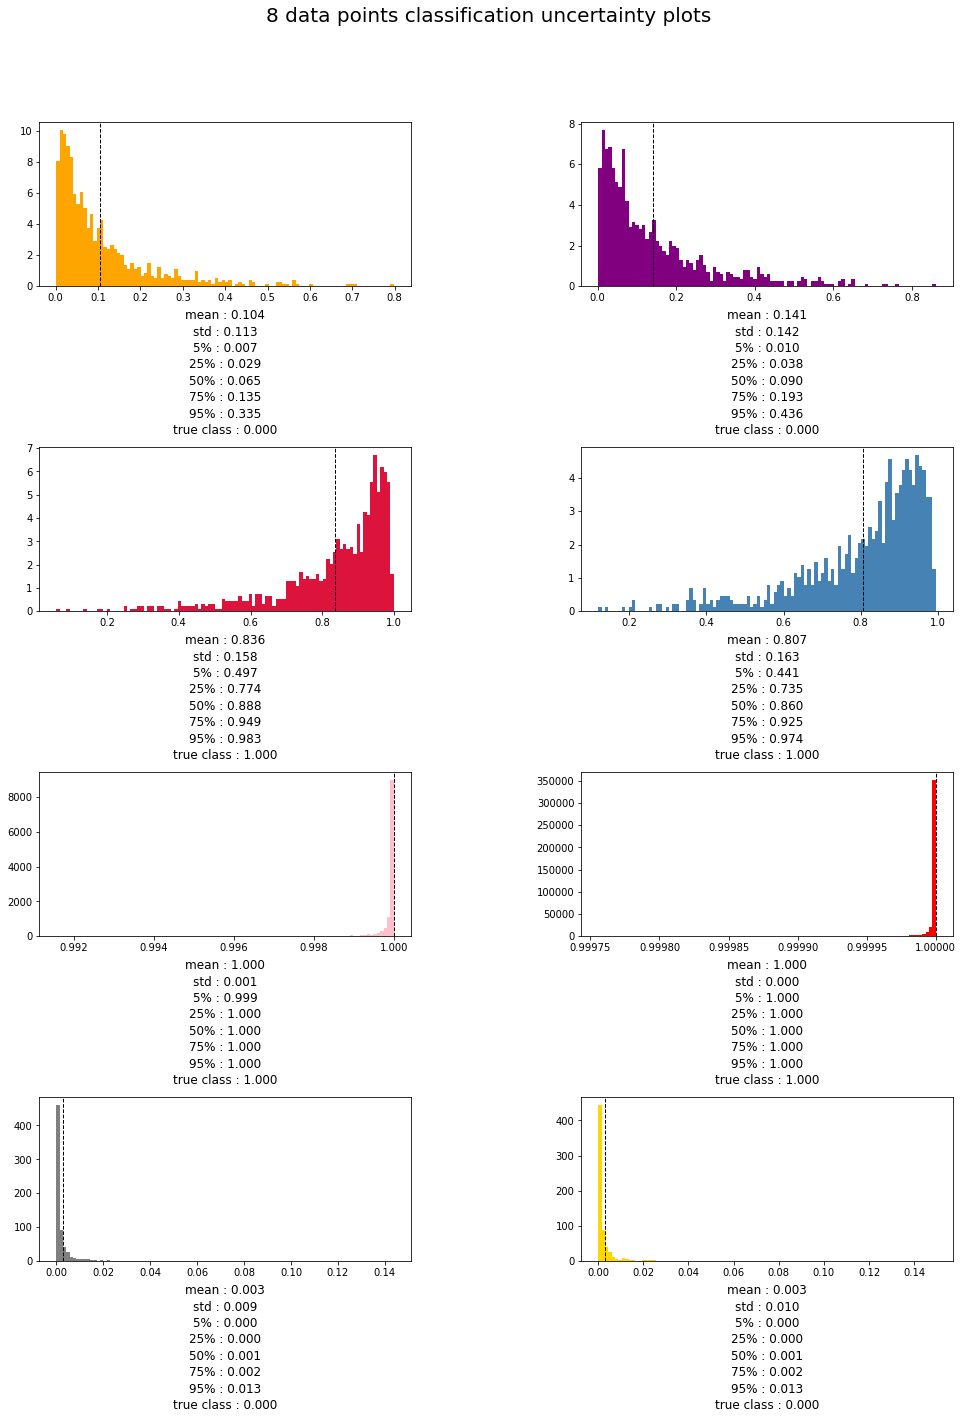

In [68]:
plot_samples(
    ps, 
    summ,
    x = 4,
    y = 2,
    pad = 14,
    figsize = (17, 20),
    colors = ['orange', 'purple', 'crimson', 'steelblue', 'pink', 'red', 'grey', 'gold'],
    title = "8 data points classification uncertainty plots"
)

### B. Model evaluation : 

In [537]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, average_precision_score 
import seaborn as sns

In [384]:
fraud_gen = generate_fraud(8000)
fraud_gen = reconstruct_fraud(fraud_gen)

In [385]:
notfraud = paysim[paysim['isFraud'] == 0][1_000_000:1_008_000][[col for col in paysim.columns if col != 'isFraud']]
dummy = np.vstack((notfraud.values,fraud_gen.numpy()))

In [386]:
samples = get_samples(
    torch.tensor(dummy),
    num_samples = 1000,
    return_sites = ['obs', '_RETURN']
)
obs = samples['obs']
ps = samples['_RETURN']

In [387]:
summ = summary(ps.T)

In [390]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(dummy)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 16000 samples in 0.061s...
[t-SNE] Computed neighbors for 16000 samples in 1.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 16000
[t-SNE] Computed conditional probabilities for sample 2000 / 16000
[t-SNE] Computed conditional probabilities for sample 3000 / 16000
[t-SNE] Computed conditional probabilities for sample 4000 / 16000
[t-SNE] Computed conditional probabilities for sample 5000 / 16000
[t-SNE] Computed conditional probabilities for sample 6000 / 16000
[t-SNE] Computed conditional probabilities for sample 7000 / 16000
[t-SNE] Computed conditional probabilities for sample 8000 / 16000
[t-SNE] Computed conditional probabilities for sample 9000 / 16000
[t-SNE] Computed conditional probabilities for sample 10000 / 16000
[t-SNE] Computed conditional probabilities for sample 11000 / 16000
[t-SNE] Computed conditional probabilities for sample 12000 / 16000
[t-SNE] Computed conditional probabilities for sam

In [405]:
p_colors = [dp['mean'] for dp in summ]
pred_classes = np.where(np.array(p_colors) > 0.5, 1, 0)
true_classes = np.hstack((np.repeat(0, 8000), np.repeat(1,8000)))

In [454]:
def visualize_TSNE_inference(X, colors, title = ''):
    plt.figure(figsize = (15,10))
    plt.scatter(X[:,0], X[:, 1], c = colors, cmap = 'viridis')
    cbar = plt.colorbar()
    cbar.ax.set_title("is Faud")
    plt.xlabel("First Component")
    plt.ylabel("Second Component")
    plt.title(title)
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


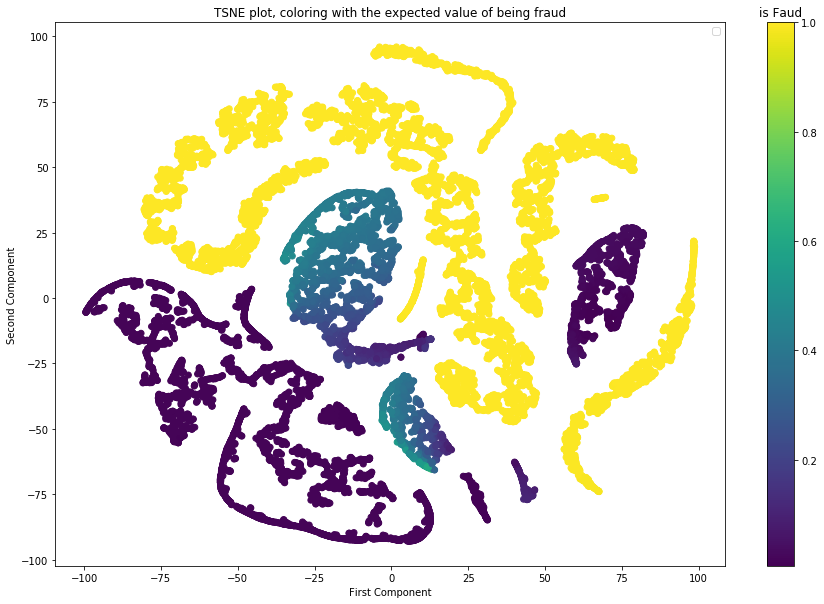

In [460]:
visualize_TSNE_inference(tsne_em, p_colors, title = "TSNE plot, coloring with the expected value of being fraud")

No handles with labels found to put in legend.


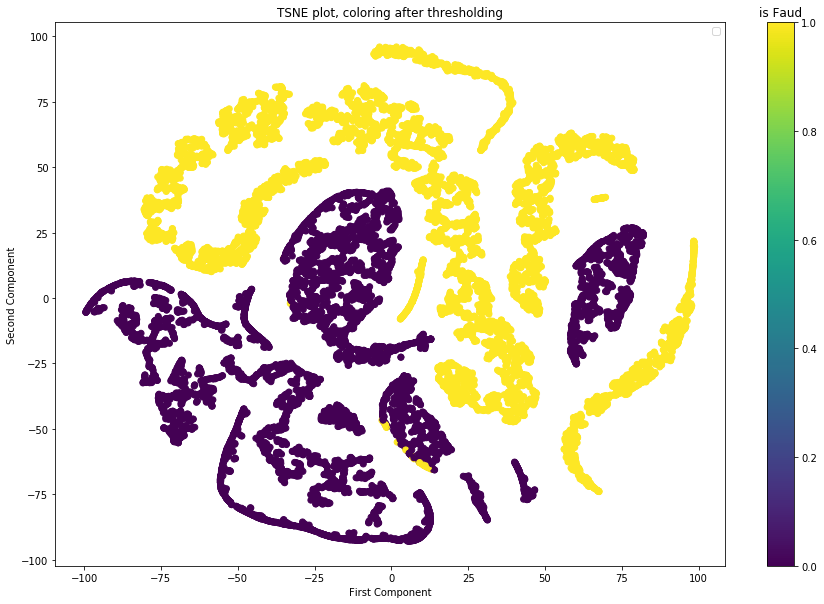

In [461]:
visualize_TSNE_inference(tsne_em, pred_classes, title = "TSNE plot, coloring after thresholding")

No handles with labels found to put in legend.


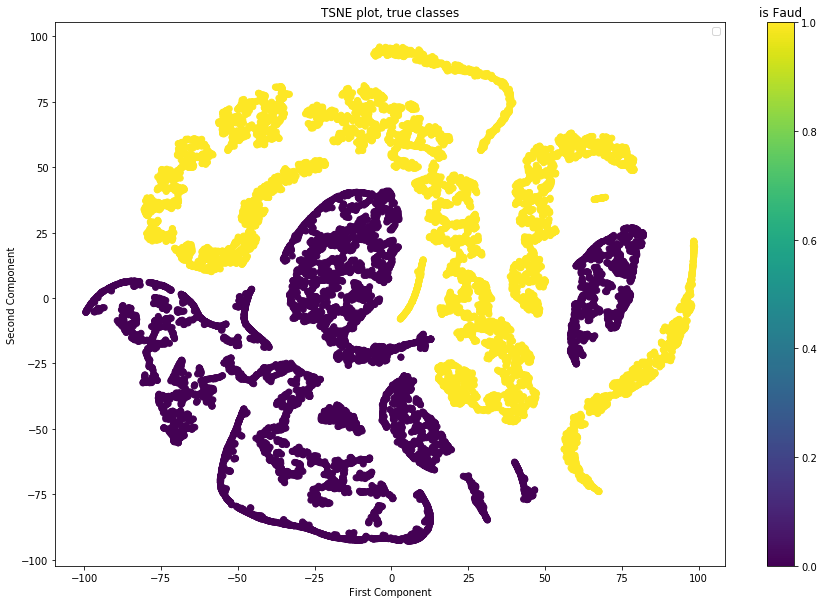

In [462]:
visualize_TSNE_inference(tsne_em, true_classes, title = "TSNE plot, true classes")

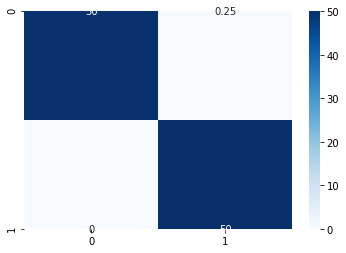

In [571]:
cm = confusion_matrix(true_classes, pred_classes)
sns.heatmap(cm/np.sum(cm)*100, annot=True, cmap = 'Blues')

In [445]:
accuracy_score(true_classes, pred_classes)

0.9975

In [447]:
precision_score(true_classes, pred_classes)

0.9950248756218906

In [449]:
f1_score(true_classes, pred_classes)

0.9975062344139651

In [450]:
recall_score(true_classes, pred_classes)

1.0

In [452]:
average_precision_score(true_classes, pred_classes)

0.9950248756218906